In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=30,20

In [49]:
df = pd.read_csv("flights_data.csv")
df

,Dates,no_of_flights
0,1/1/2005,594924
1,2/1/2005,545332
2,3/1/2005,617540
3,4/1/2005,594492
4,5/1/2005,614802
5,6/1/2005,609195
6,7/1/2005,627961
7,8/1/2005,630904
8,9/1/2005,574253
9,10/1/2005,592712


In [50]:
# Shape of Dataset
df.shape

(36, 2)

In [51]:
# Quick Profiling
import pandas_profiling as pp

In [52]:
# Generate A Profile Report
# pp.ProfileReport(df)

In [53]:
from fbprophet import Prophet

# To Check If Data is Stationary

<AxesSubplot:>

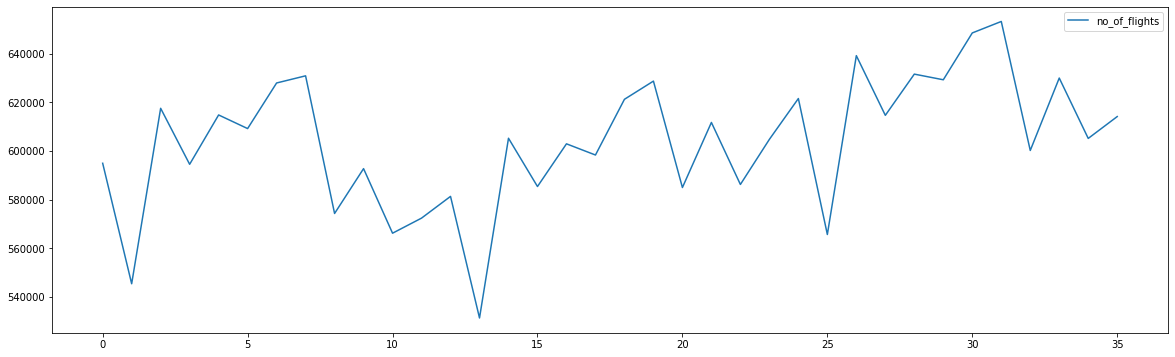

In [54]:
# Plot Test
df.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

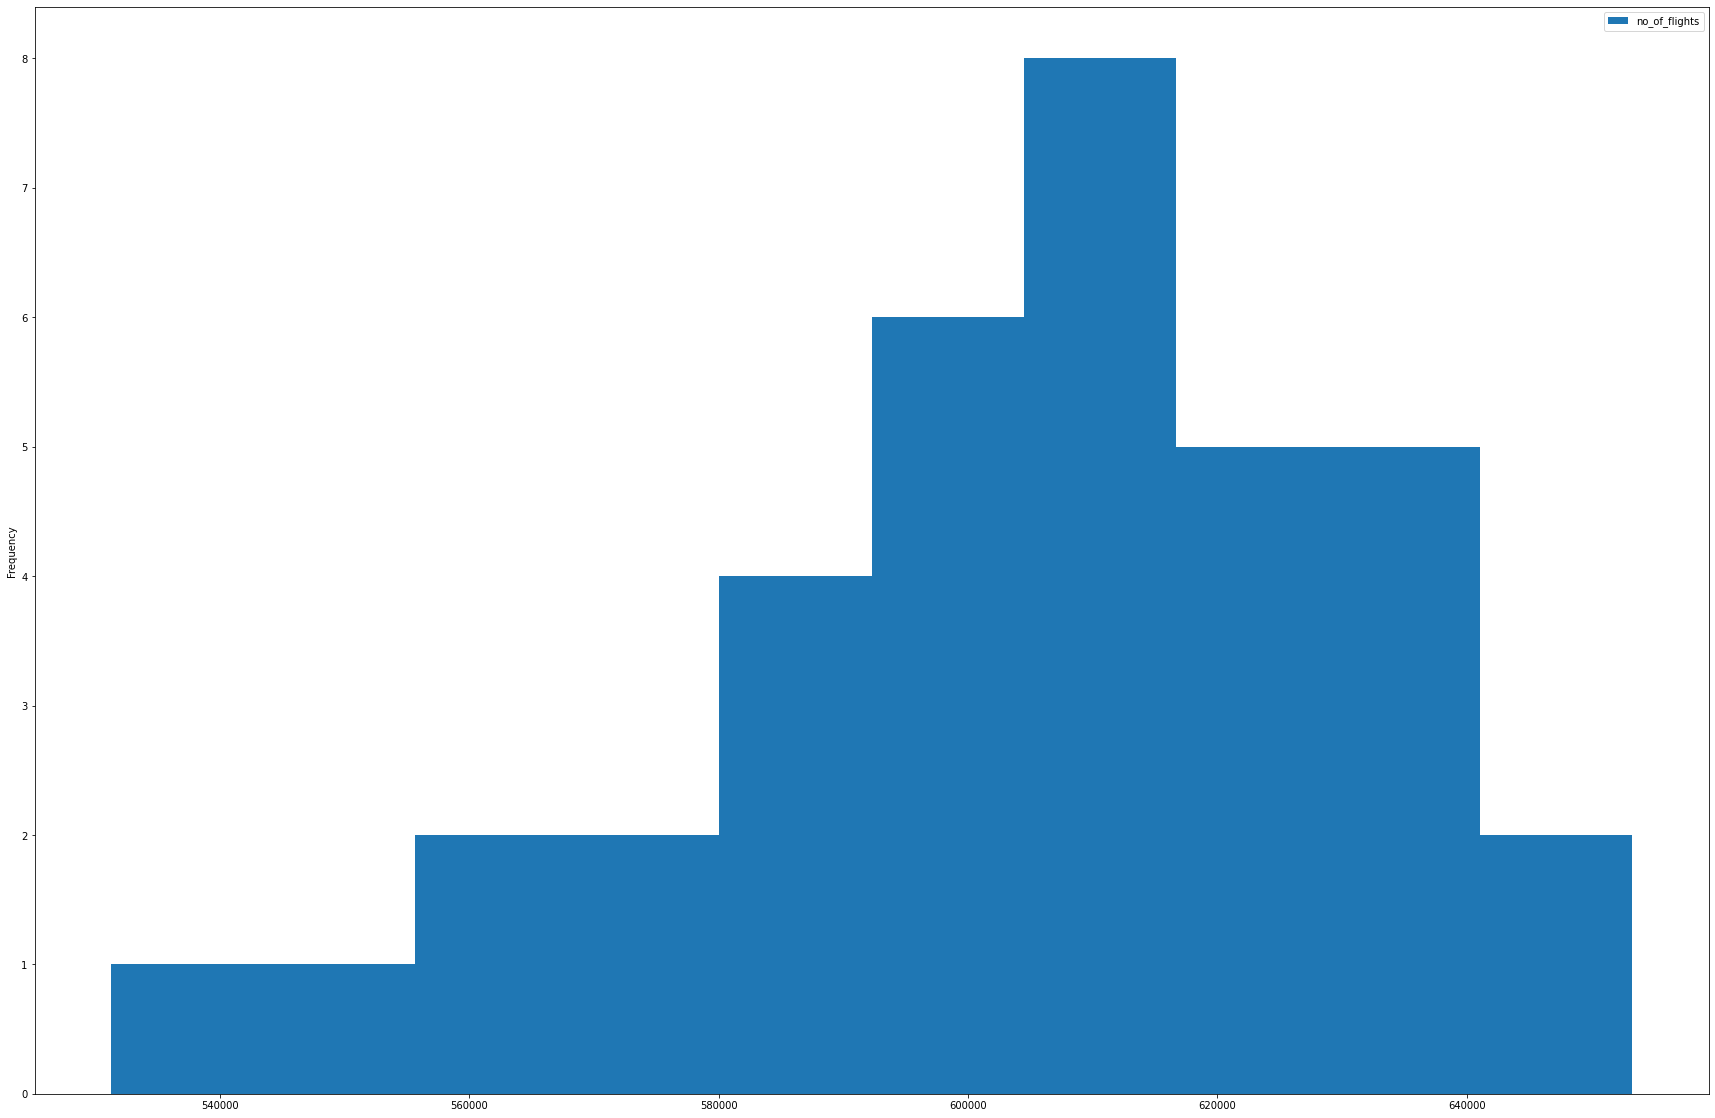

In [55]:
# Histogram
df.plot(kind="hist")

Not a gaussian bell curve not stationary

In [56]:
df.shape

(36, 2)

In [57]:
df.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [58]:
# Create A Series
X = df['no_of_flights'].values
# Split our dataset
len(X)/2
X1, X2 = X[0:18], X[18:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=591385.1111111111, mean2=616155.6111111111
variance1=667492396.6543211, variance2=485281695.4598766


Not Stationary since the variance are not in the same range

# Augment Dickey Fuller Test

In [59]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value {}'.format(key)] = value
    print (df_output)
    
adf_test(df['no_of_flights'])

Results of Aug. Dickey-Fuller Test:
Test Statistic                 -0.693138
p-value                         0.848519
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value 1%              -3.723863
Critical Value 5%              -2.986489
Critical Value 10%             -2.632800
dtype: float64


Test Stats is 0.320841 which is greater than Critical Value at all point hence it is not
Not Stationary

In [63]:
def is_stationary(stats,critical_value):
    if stats < critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")



In [65]:
is_stationary(-0.693138,-3.723863)

Not Stationary


# KPSS Test

In [15]:
# Opposite of AD Fuller
# Load Pkg
from statsmodels.tsa.stattools import kpss

#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value {}'.format(key)] = value
    print (kpss_output)

In [66]:
kpss_test(df['no_of_flights'])

Results of KPSS Test:
Test Statistic          0.333669
p-value                 0.100000
Lags Used              10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


C:\Users\Yousuf\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\Yousuf\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


If test is greater than critical value it is stationary

In [17]:
def is_stationary_kpss(stats,critical_value):
    if stats > critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")

In [67]:
is_stationary_kpss( 0.333669,0.347000)

Not Stationary


# to Make it Stationary

<AxesSubplot:>

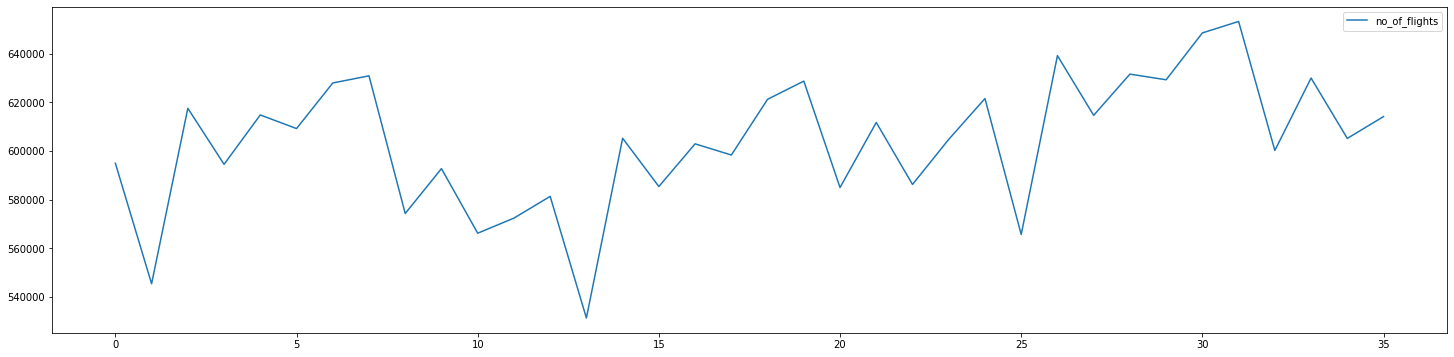

In [68]:
df.plot(figsize=(25,6))

In [70]:
df2 = df
# Reformat
df2.set_index(pd.DatetimeIndex(df2['Dates']))

,Dates,no_of_flights
Dates,,
2005-01-01,1/1/2005,594924
2005-02-01,2/1/2005,545332
2005-03-01,3/1/2005,617540
2005-04-01,4/1/2005,594492
2005-05-01,5/1/2005,614802
2005-06-01,6/1/2005,609195
2005-07-01,7/1/2005,627961
2005-08-01,8/1/2005,630904
2005-09-01,9/1/2005,574253


In [71]:
df2.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [72]:
df2 = df2.drop('Dates',axis=1)

<AxesSubplot:>

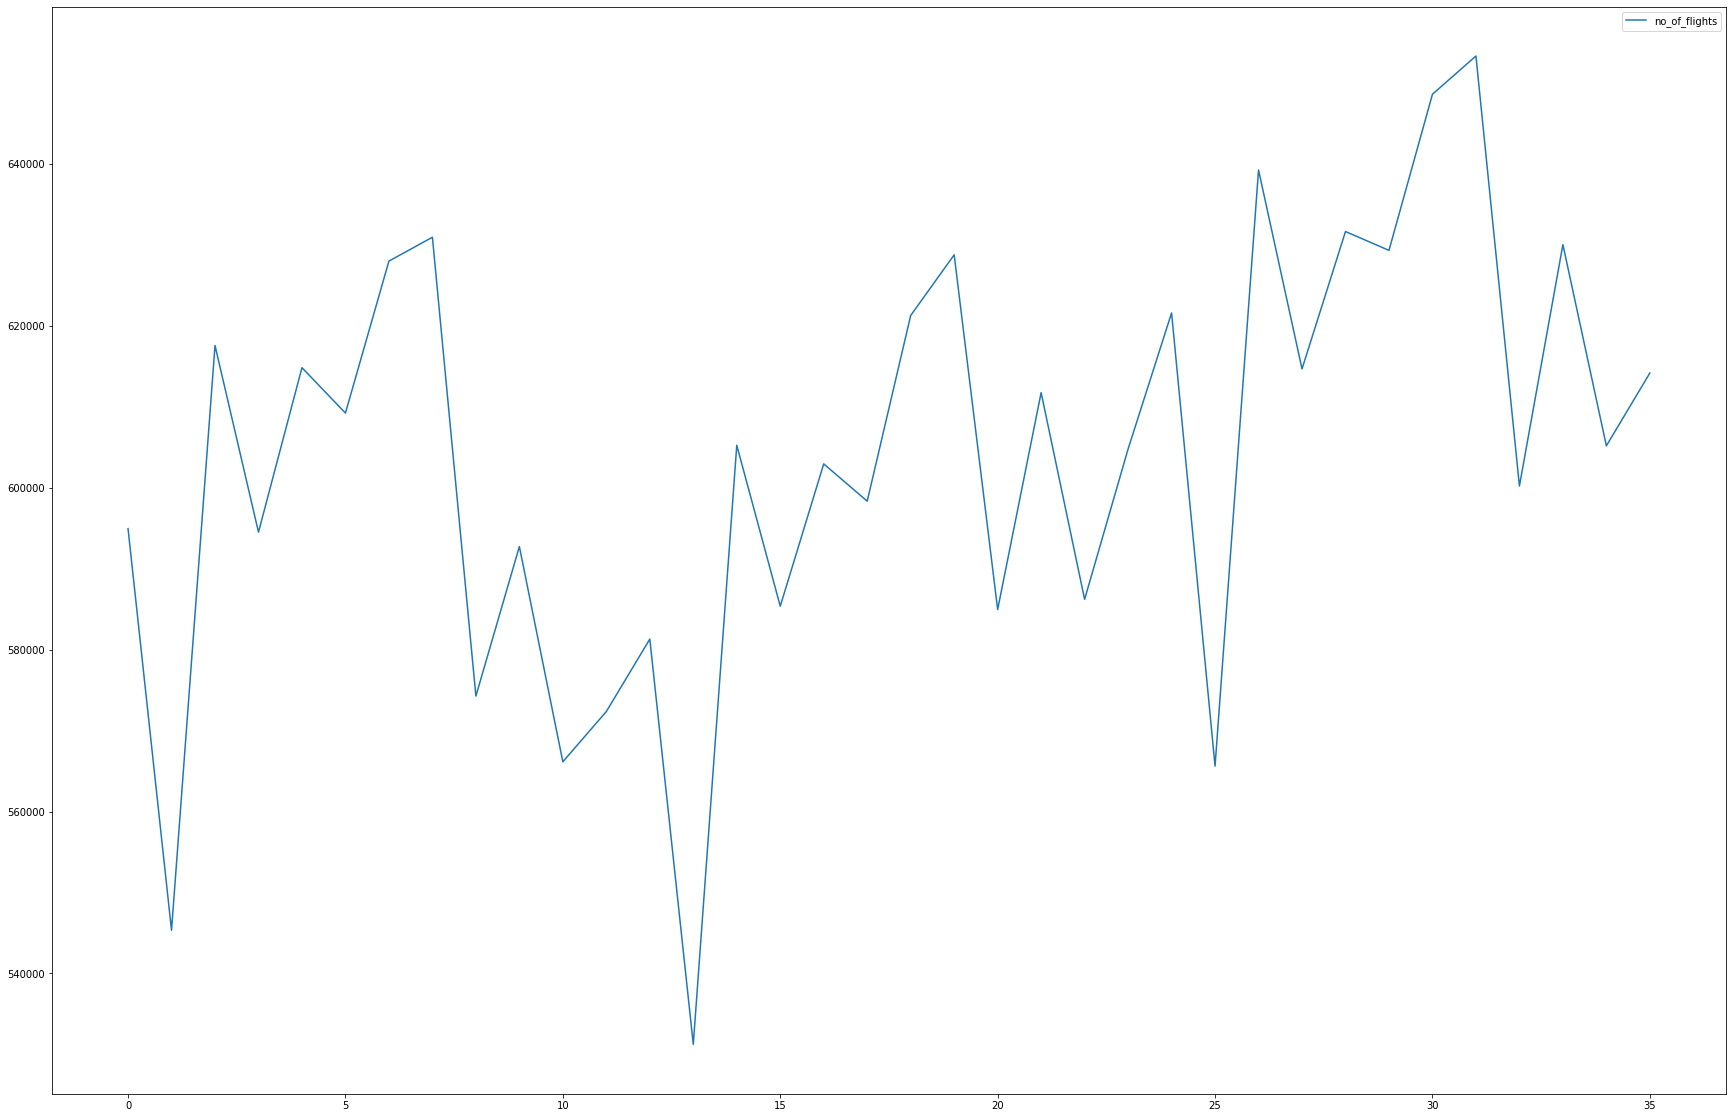

In [73]:
df2.plot()

In [74]:
df2.columns

Index(['no_of_flights'], dtype='object')

# Method 1 :Differencing To Fix Non Stationary Dataset

<AxesSubplot:>

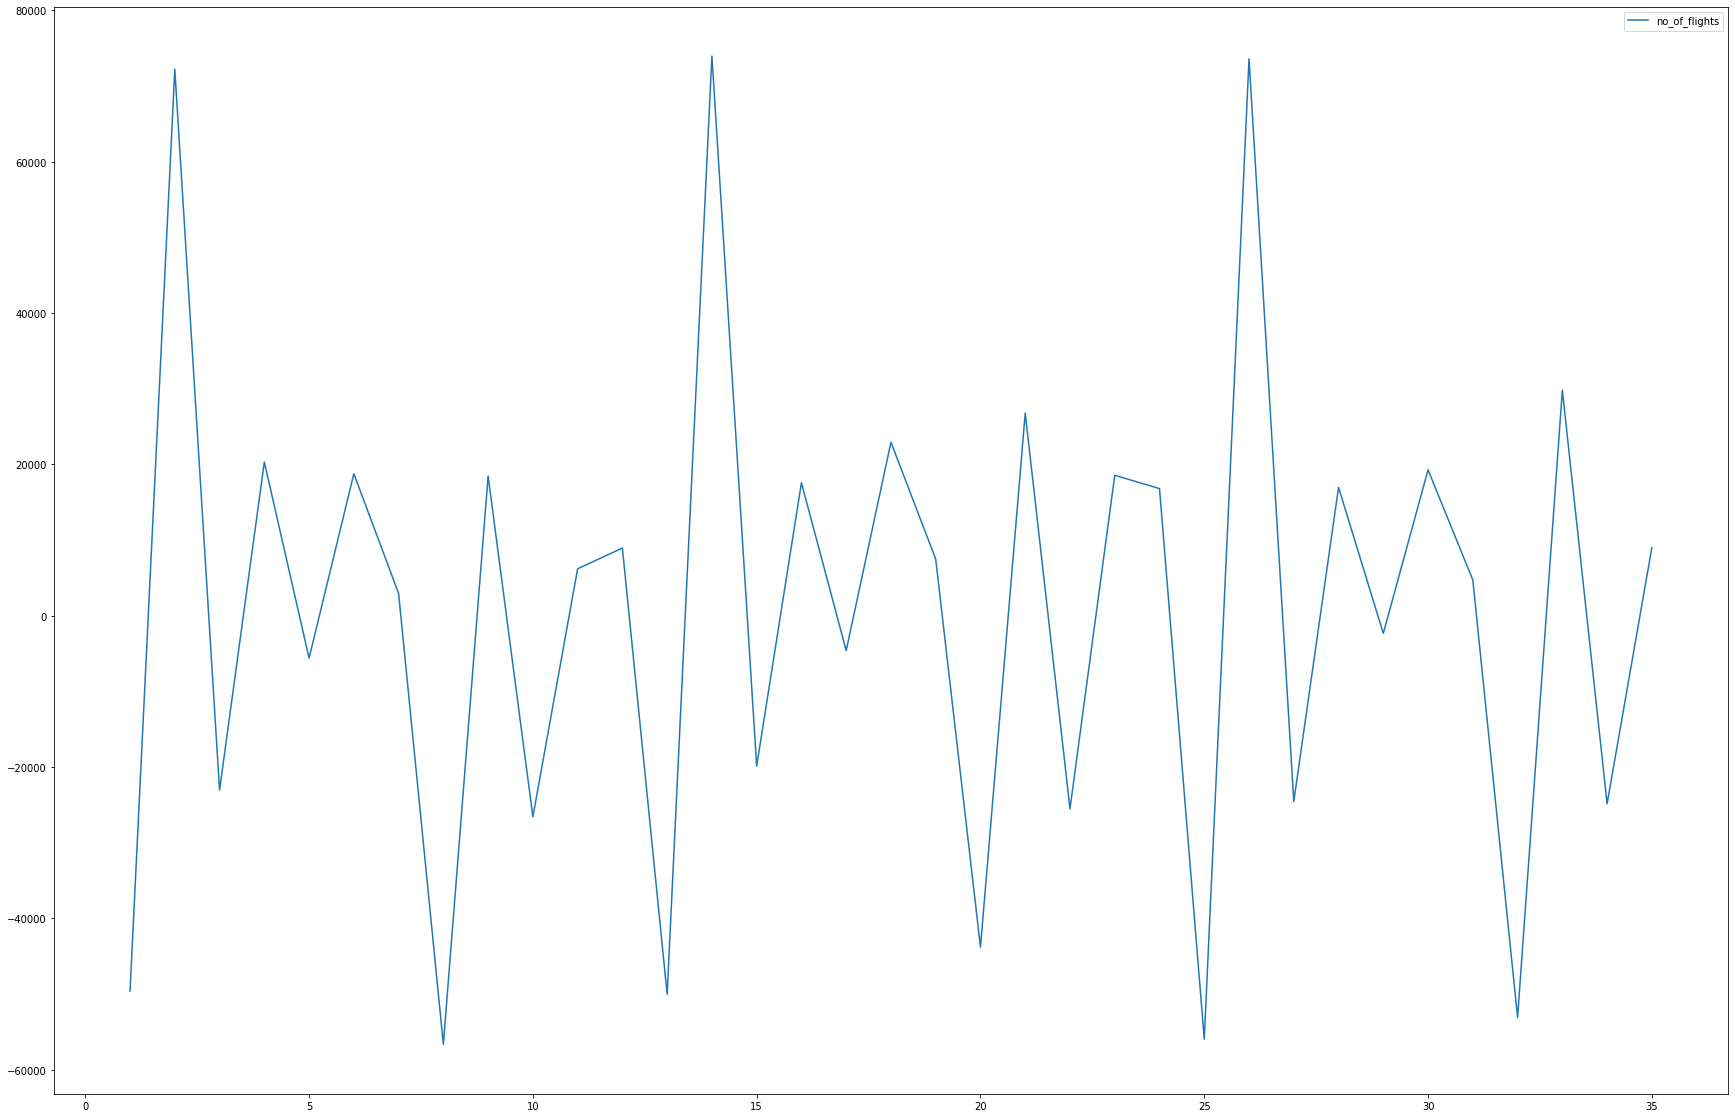

In [75]:
# Differencing To Fix Non Stationary Dataset
df2['no_of_flights'] = df2['no_of_flights'] - df2['no_of_flights'].shift(1)
df2.plot()

<AxesSubplot:>

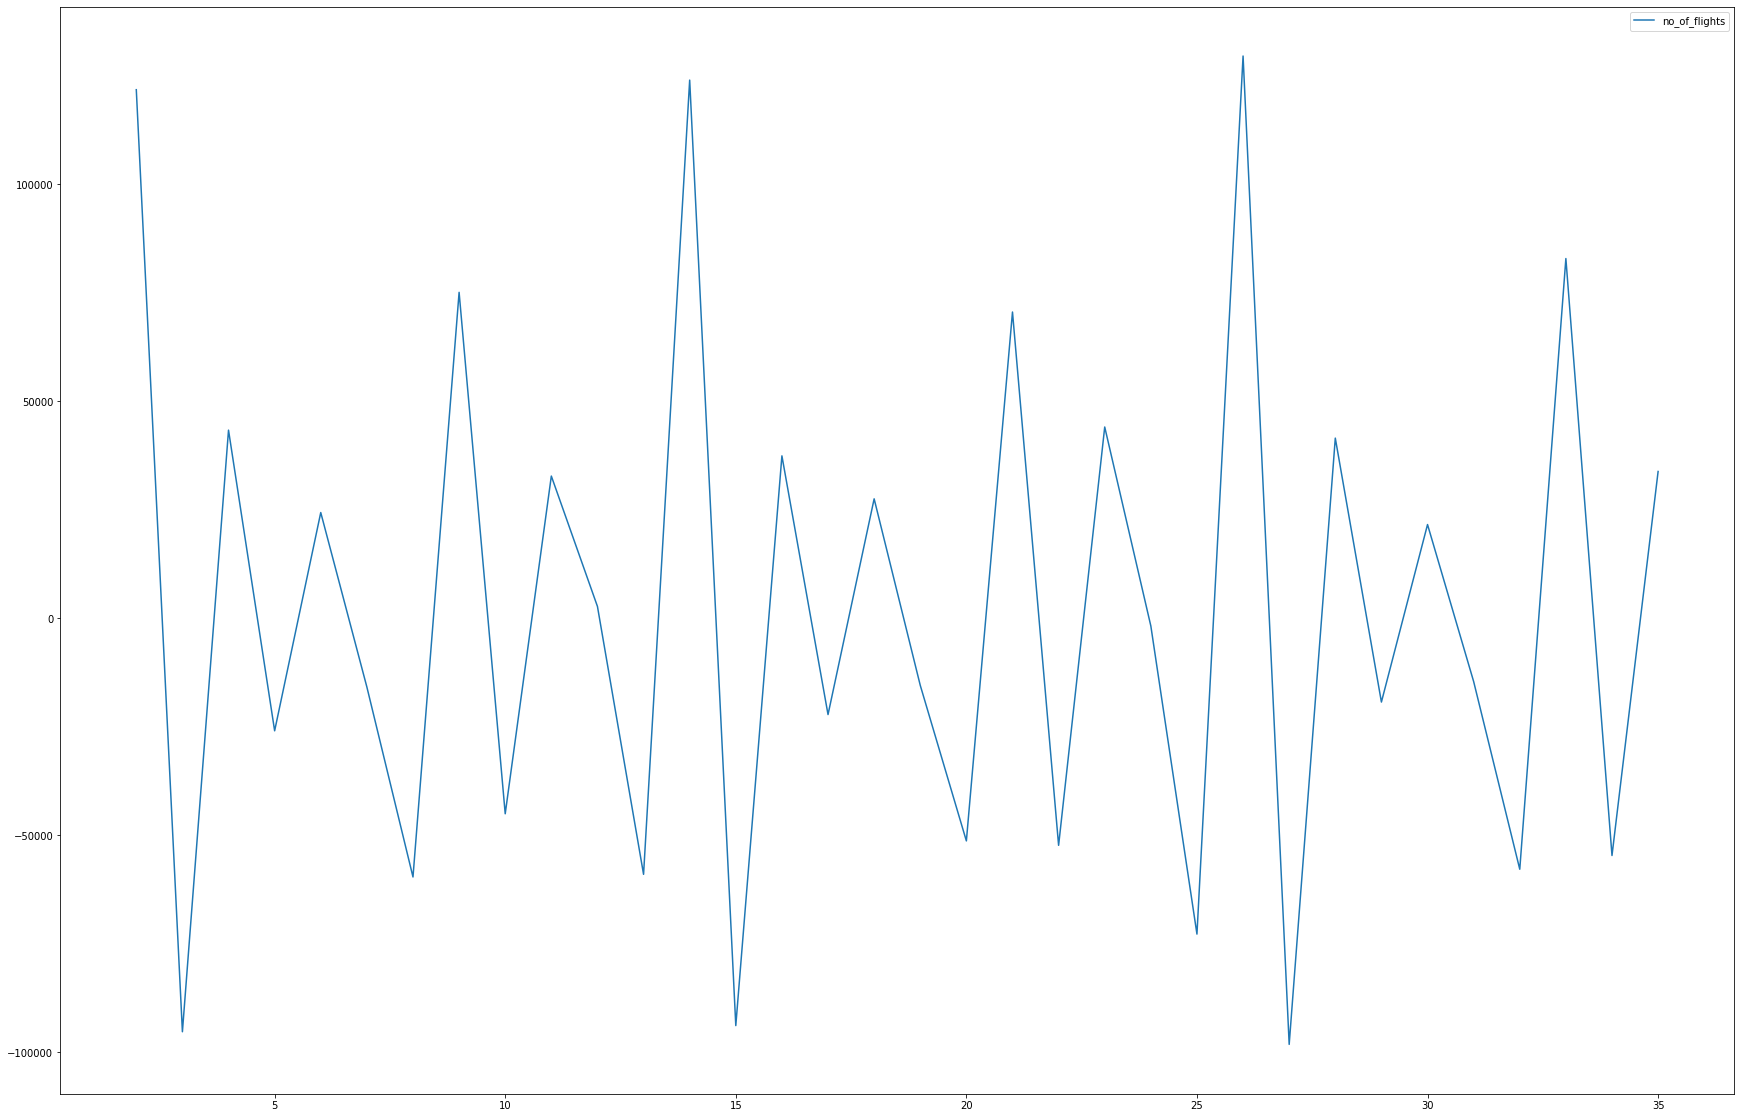

In [76]:
### Using Pandas Diff on Dataset with DatetimeIndex
df_diff = df2.diff(periods=1)

df_diff.plot()

<AxesSubplot:ylabel='Frequency'>

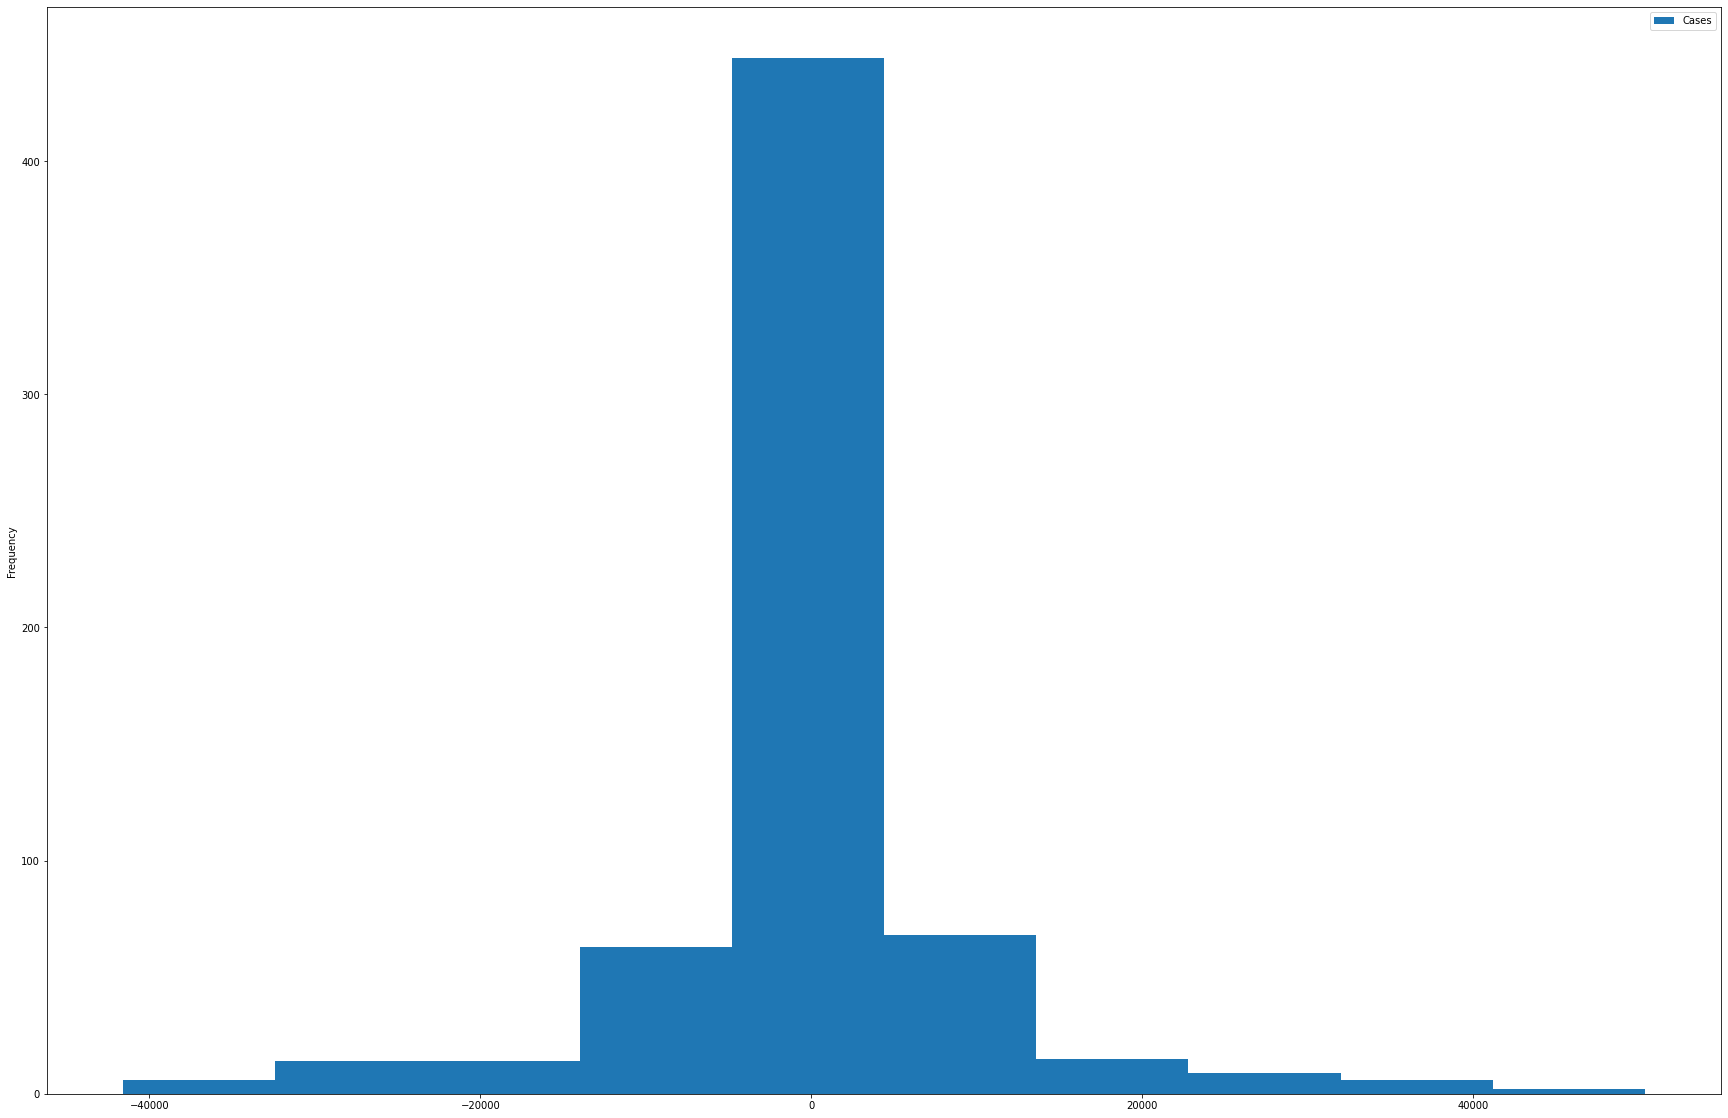

In [27]:
df_diff.plot(kind='hist')

Our Dataset is now stationary

# Method 2 : Log Transform

In [28]:
# Load Pkgs
import numpy as np

<AxesSubplot:>

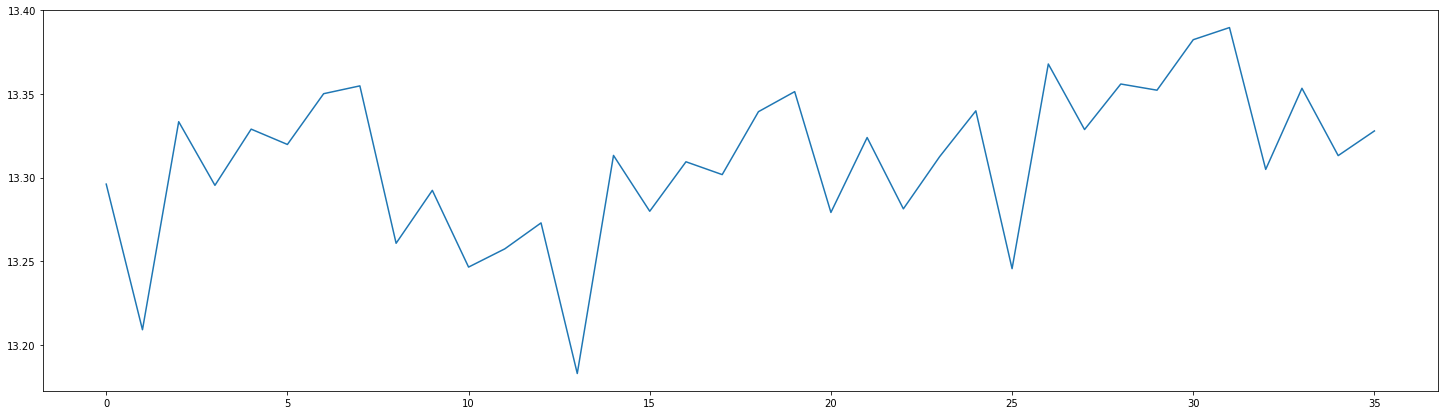

In [77]:
df3 = df
X2 = df3['no_of_flights']
trans_df = np.log(X2)
trans_df.plot(figsize=(25,7))

# To Find Trends,Seasonality

In [79]:
# Load Stats Pkgs
import statsmodels.api as sm

df_n = pd.read_csv('flights_data.csv',parse_dates=['Dates'],index_col='Dates')
df_n.head()

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [80]:
# Set Date Col to Index
df_n.dtypes

no_of_flights    int64
dtype: object

In [81]:
# Makes it Easier to Manipulate by Time/Date
df_n['2005']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


In [82]:
# We Can select by range of years
df_n['2005':'2006']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


<AxesSubplot:xlabel='Dates'>

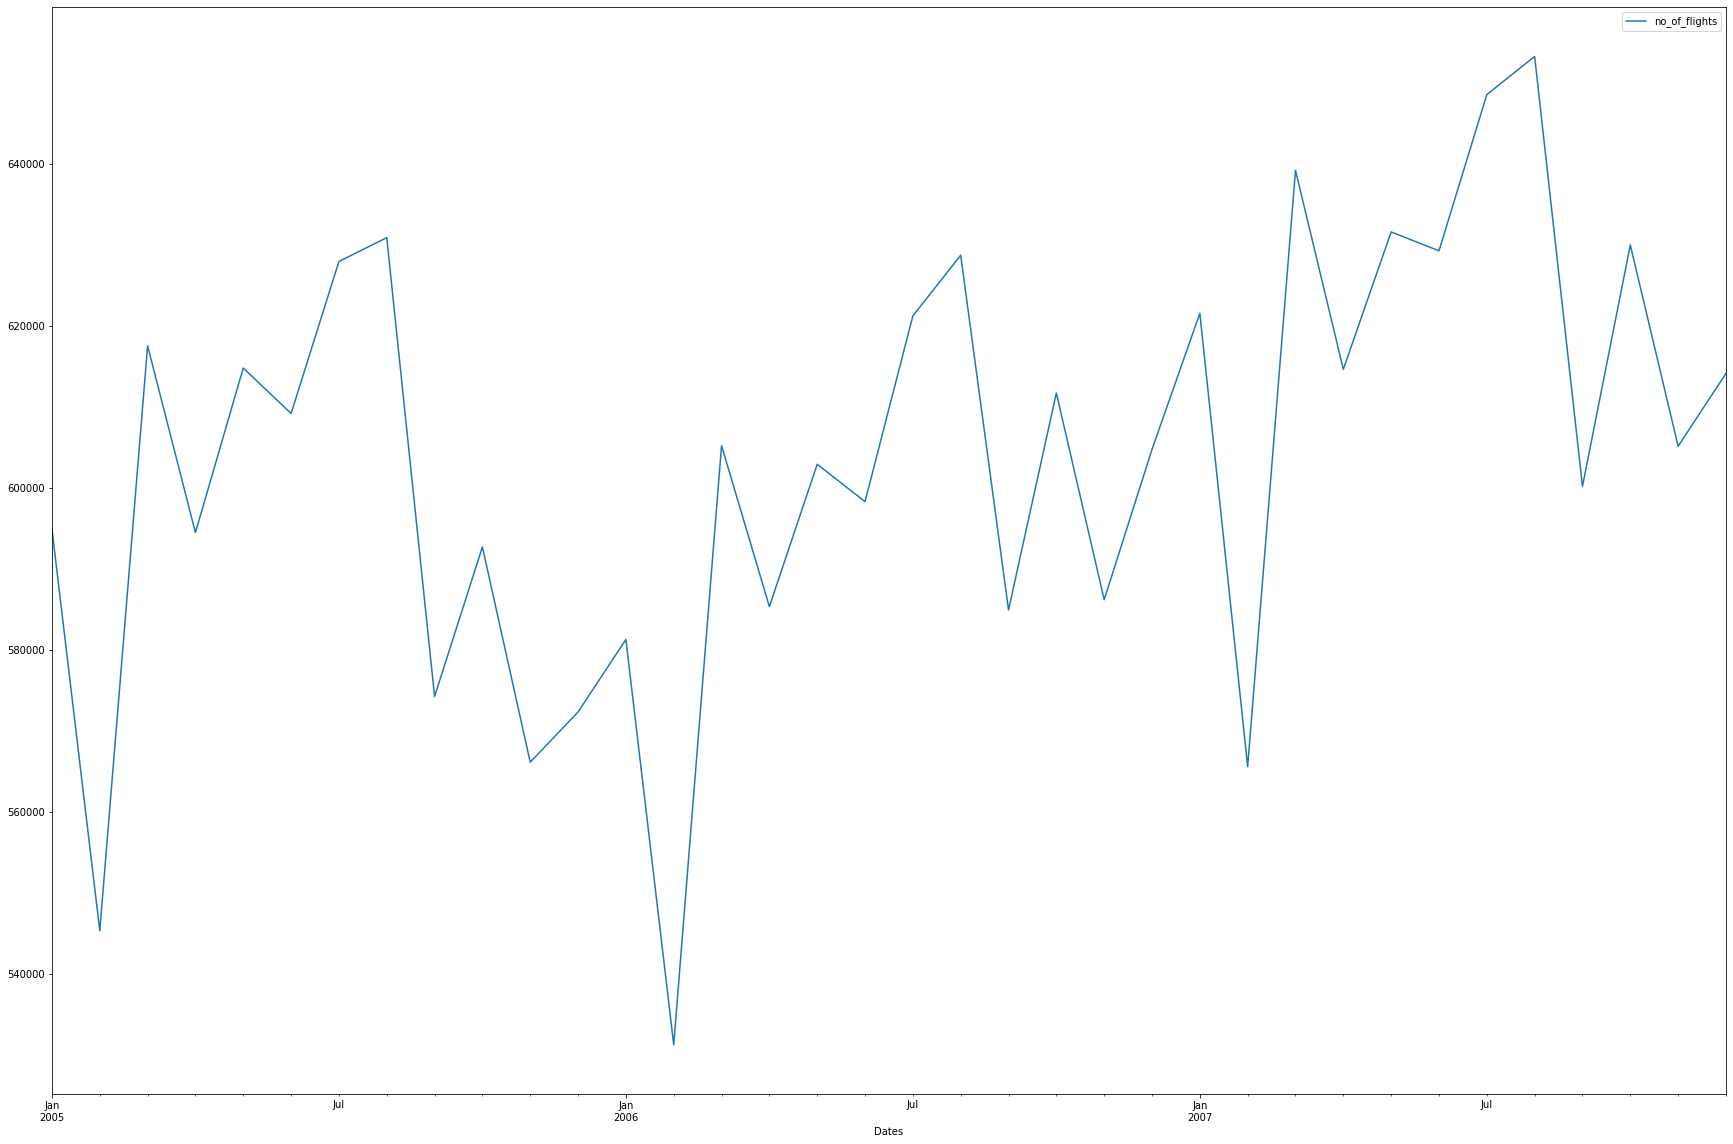

In [83]:
df_n.plot()

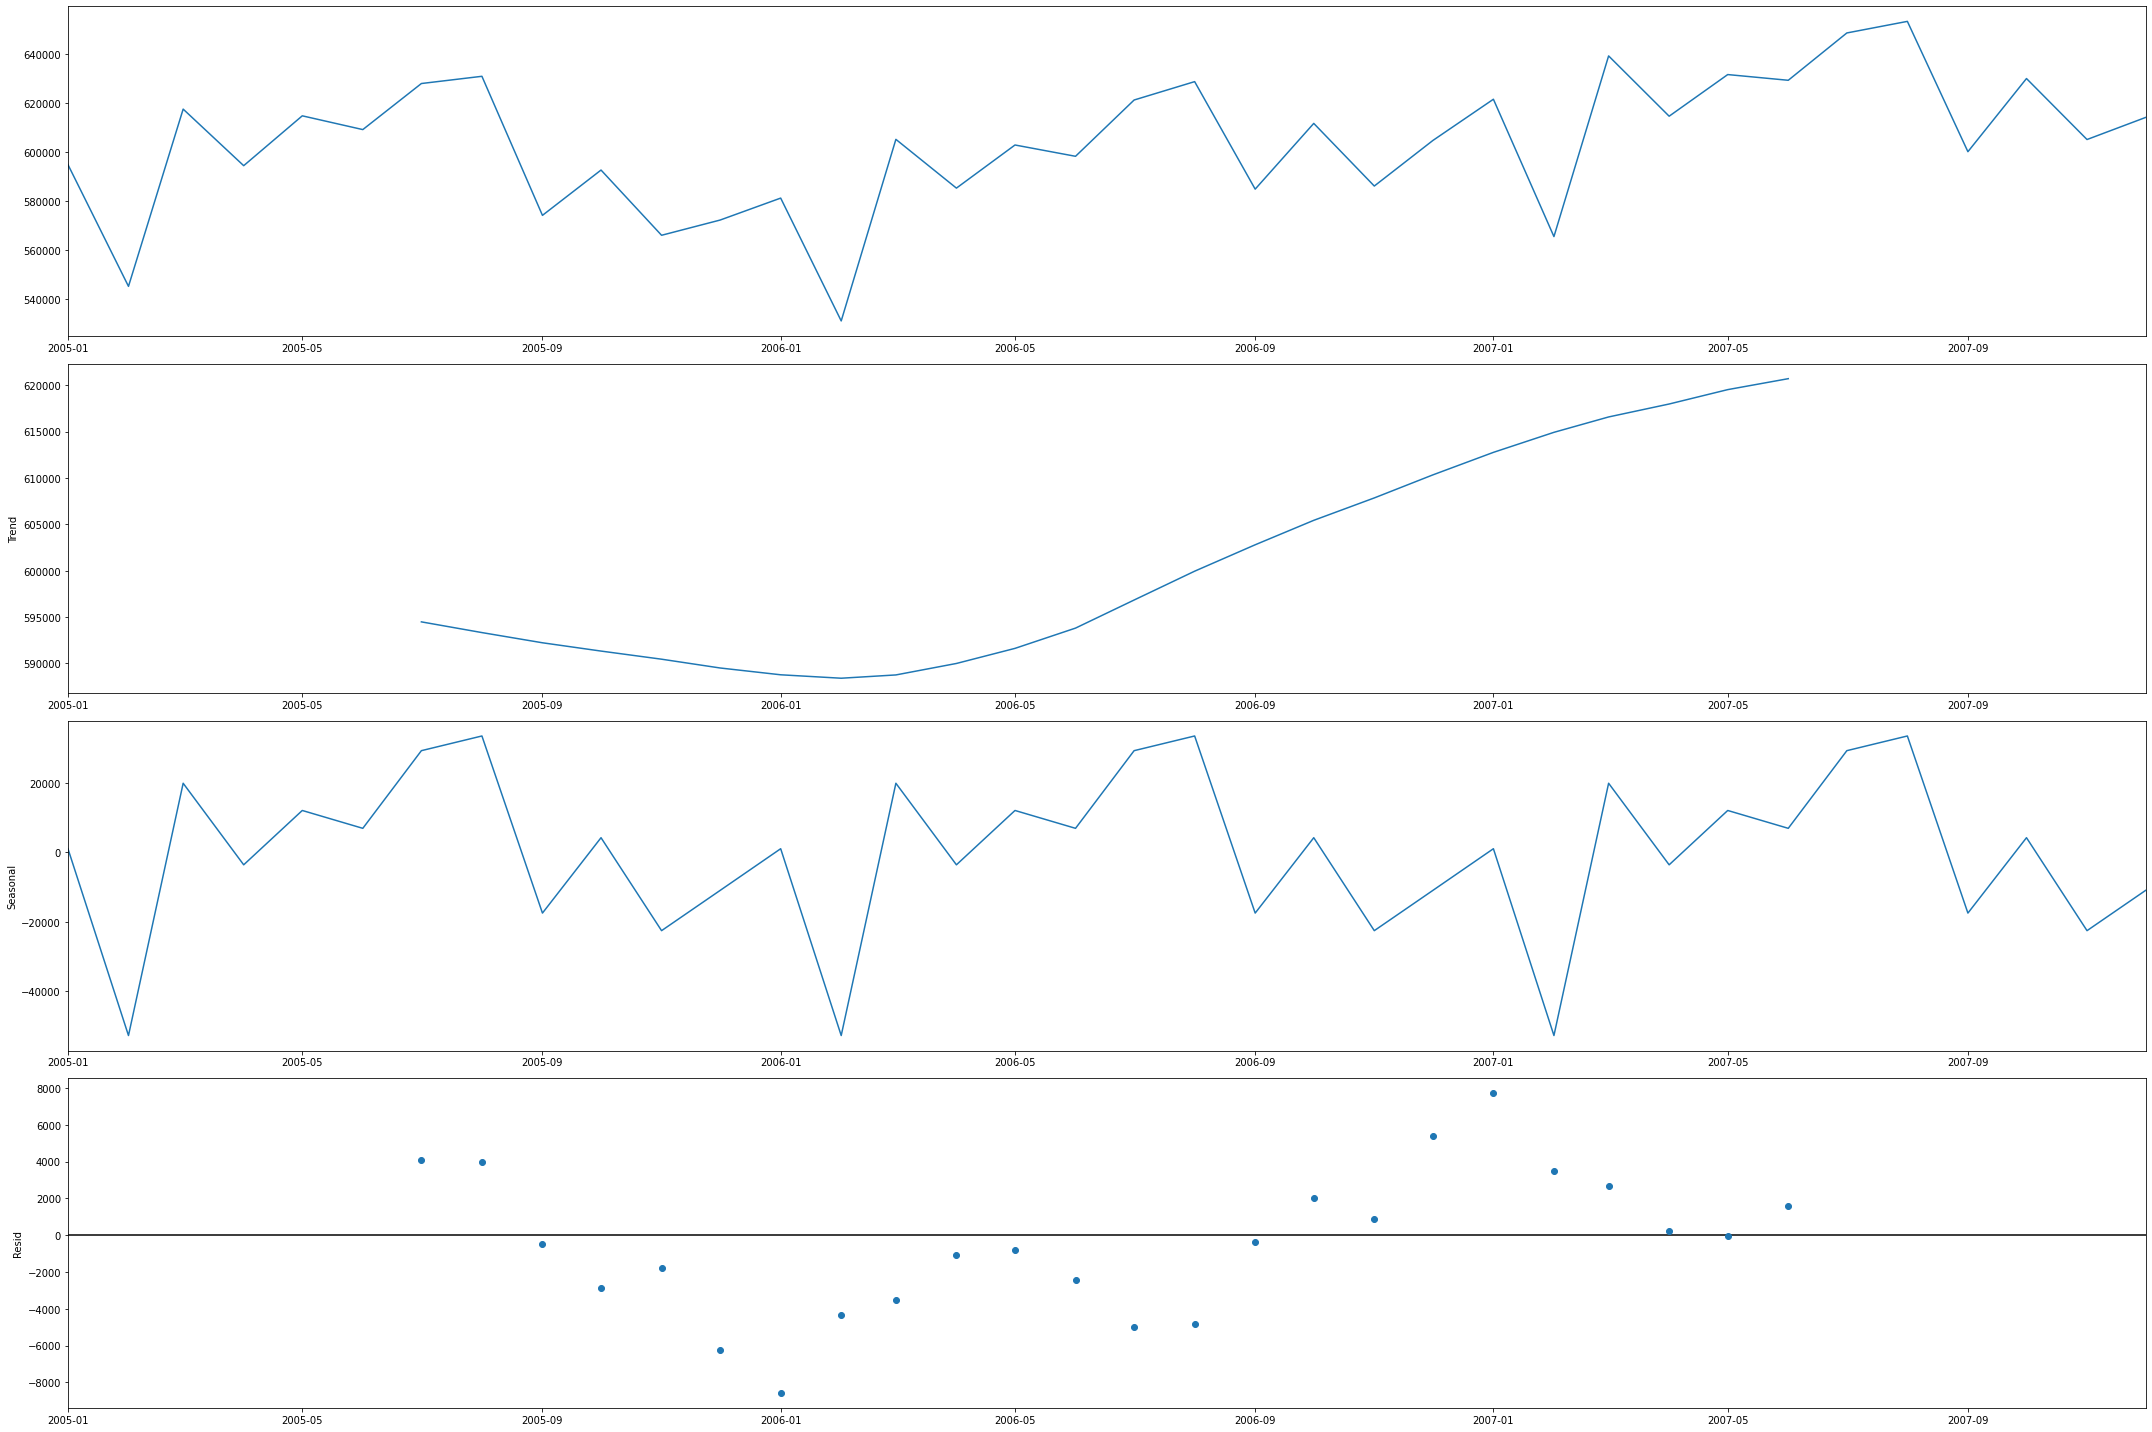

In [84]:
#### Decomposition Plot
decomposition = sm.tsa.seasonal_decompose(df_n, model='additive')
fig = decomposition.plot()

<AxesSubplot:ylabel='Frequency'>

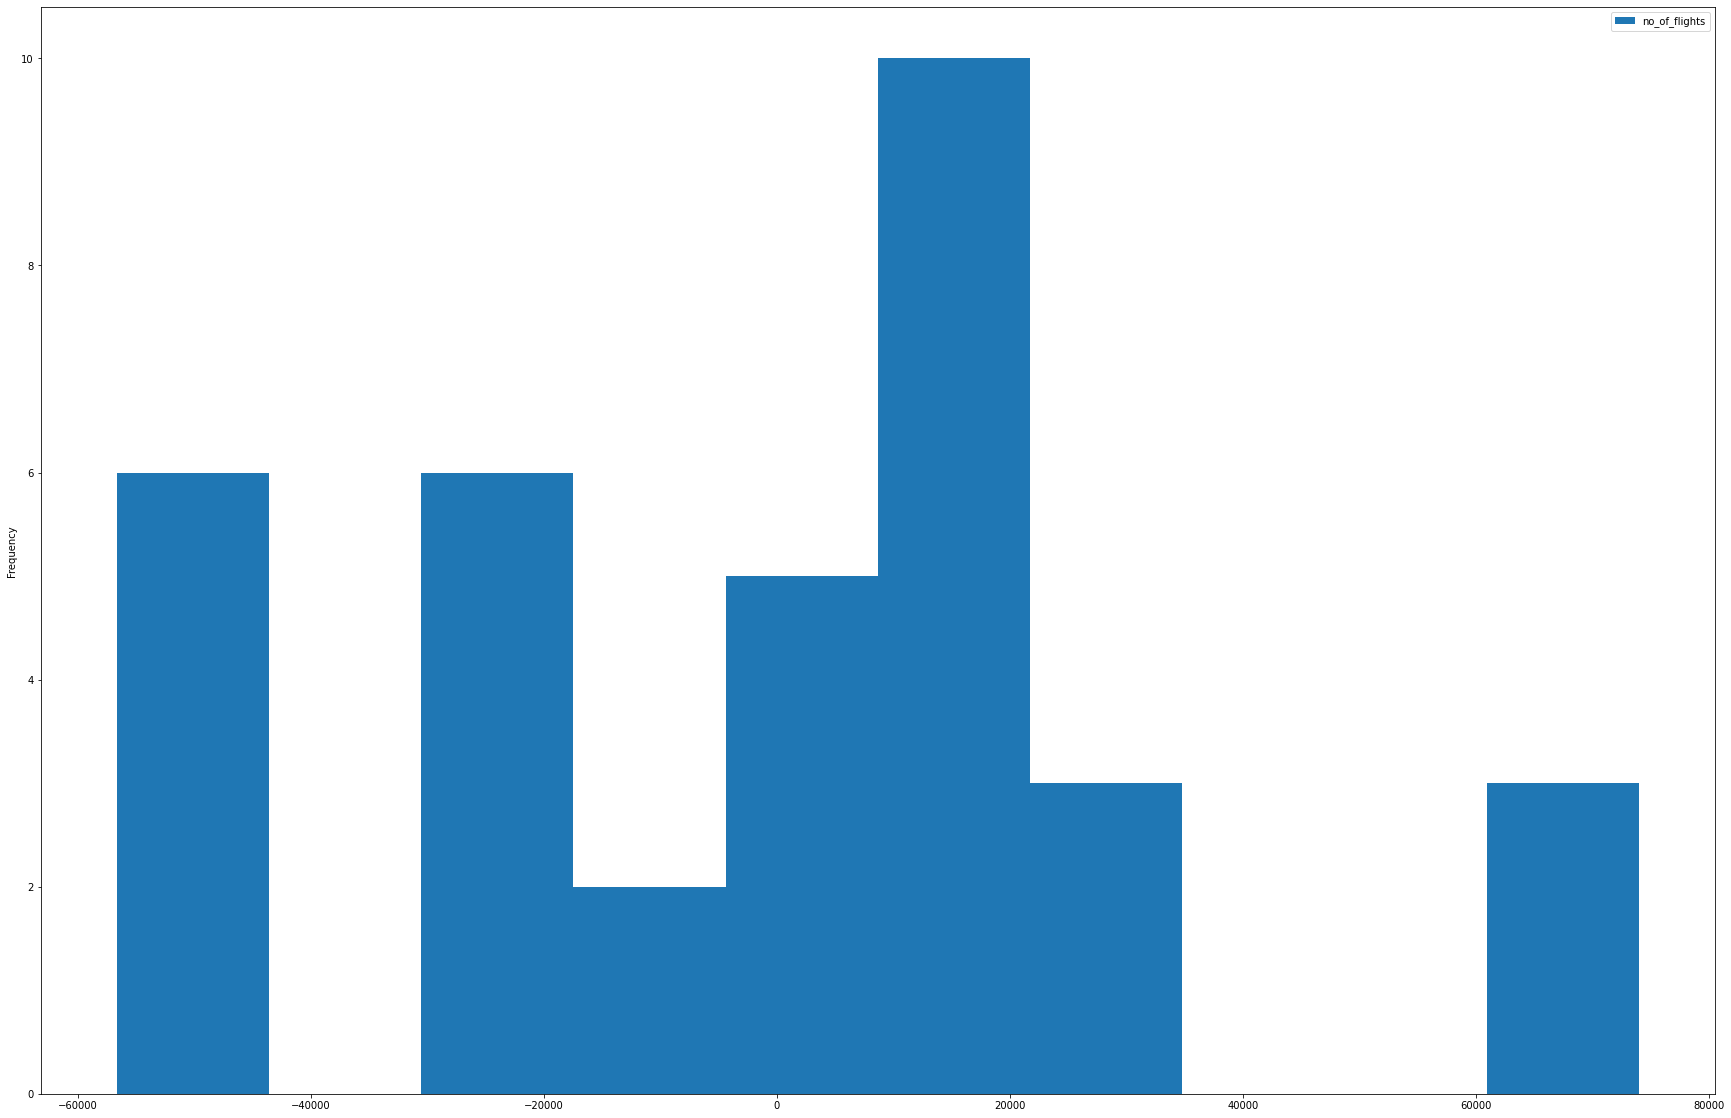

In [85]:
# Make it stationary
sdf = df_n.diff(periods=1)
sdf.plot(kind='hist')

# Building Model

In [86]:
# load Timeseries Pkgs
from fbprophet import Prophet

# Initialize the Model
m = Prophet()

In [87]:
sdf

,no_of_flights
Dates,
2005-01-01,NaN
2005-02-01,-49592.0
2005-03-01,72208.0
2005-04-01,-23048.0
2005-05-01,20310.0
2005-06-01,-5607.0
2005-07-01,18766.0
2005-08-01,2943.0
2005-09-01,-56651.0


In [88]:
# Make the index as ds
sdf['ds'] = sdf.index
sdf.columns

Index(['no_of_flights', 'ds'], dtype='object')

In [89]:
# Works with a ds and y column names
sdf.rename(columns={'ds':'ds','no_of_flights':'y'},inplace=True)
sdf.head()

,y,ds
Dates,,
2005-01-01,NaN,2005-01-01
2005-02-01,-49592.0,2005-02-01
2005-03-01,72208.0,2005-03-01
2005-04-01,-23048.0,2005-04-01
2005-05-01,20310.0,2005-05-01


In [90]:
new_df = sdf[['ds','y']]
new_df.head()

,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0


In [91]:
# Fit our Mode to our Data
m.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
# Create Future Dates of 360 days
future_dates = m.make_future_dataframe(periods=365)
future_dates.head()

,ds
0,2005-01-01
1,2005-02-01
2,2005-03-01
3,2005-04-01
4,2005-05-01


In [93]:
# Shape of Dataset
new_df.shape

(36, 2)

In [94]:
# Shape after adding 365 days
future_dates.shape

(401, 1)

In [95]:
# Make Prediction with our Model
prediction = m.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,-2711.794371,840.513978,7735.901793,-2711.794371,-2711.794371,6767.602612,6767.602612,6767.602612,6767.602612,6767.602612,6767.602612,0.0,0.0,0.0,4055.808240
1,2005-02-01,-2571.714049,-53007.283721,-46151.048187,-2571.714049,-2571.714049,-46882.135944,-46882.135944,-46882.135944,-46882.135944,-46882.135944,-46882.135944,0.0,0.0,0.0,-49453.849993
2,2005-03-01,-2445.189887,67370.222225,74133.338194,-2445.189887,-2445.189887,73145.012814,73145.012814,73145.012814,73145.012814,73145.012814,73145.012814,0.0,0.0,0.0,70699.822927
3,2005-04-01,-2305.109560,-27281.107379,-20671.347581,-2305.109560,-2305.109560,-21686.914132,-21686.914132,-21686.914132,-21686.914132,-21686.914132,-21686.914132,0.0,0.0,0.0,-23992.023692
4,2005-05-01,-2169.547956,14695.112415,21105.097974,-2169.547956,-2169.547956,19993.464236,19993.464236,19993.464236,19993.464236,19993.464236,19993.464236,0.0,0.0,0.0,17823.916280



yhat : the predicted forecast

yhat_lower : the lower border of the prediction

yhat_upper: the upper border of the prediction

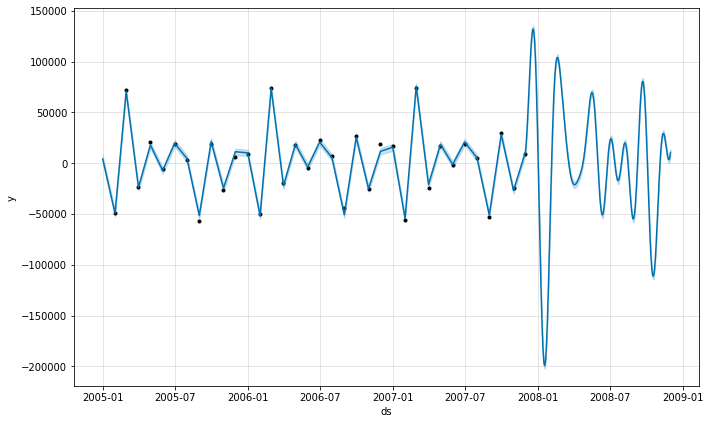

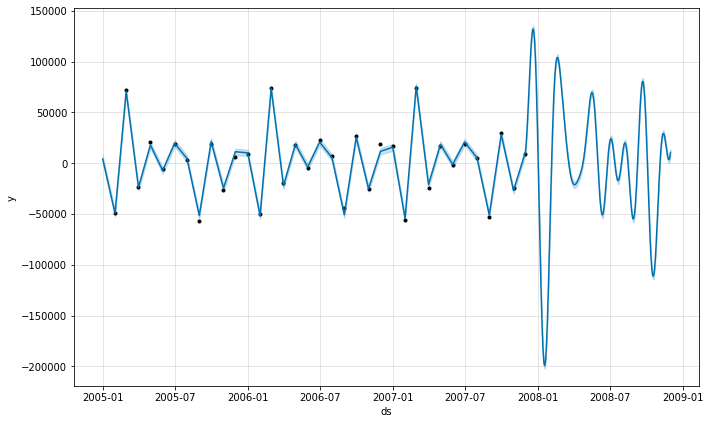

In [96]:
# Plot Our Predictions
m.plot(prediction)

A Trending data

Black dots : the actual data points in our dataset.

Deep blue line : the predicted forecast/the predicted values

Light blue line : the boundaries

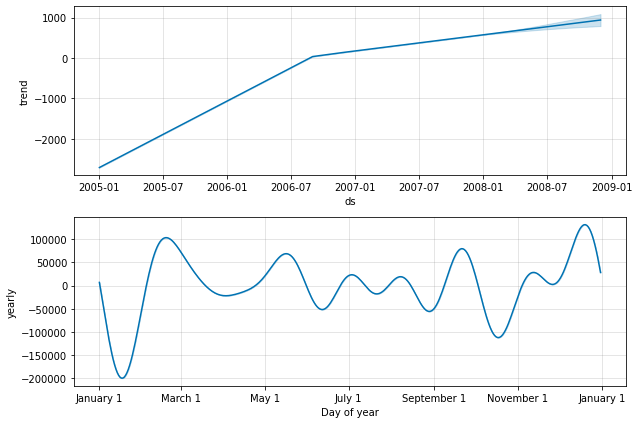

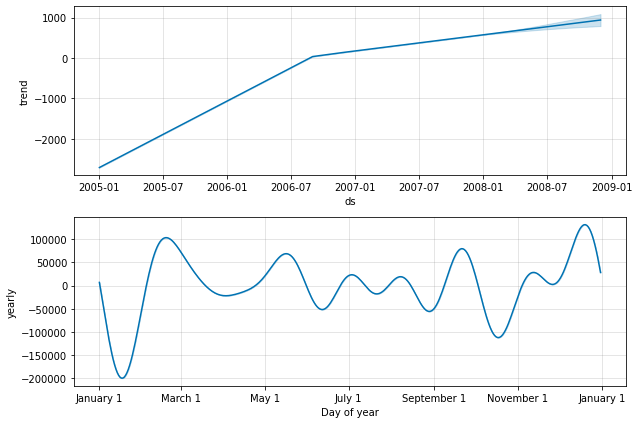

In [97]:
# Visualize Each Component [Trends,Weekly]
m.plot_components(prediction)

# Cross Validation


For measuring forecast error by comparing the predicted values with the actual values

initial:the size of the initial training period

period : the spacing between cutoff dates

horizon : the forecast horizon

In [99]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

new_df.shape

(36, 2)

In [100]:
cv = cross_validation(m,initial='36 days',period='180 days',horizon="365 days")
cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,8.763736e+05,8.763736e+05,8.763736e+05,18766.0,2005-06-09
1,2005-08-01,1.291269e+06,1.291269e+06,1.291269e+06,2943.0,2005-06-09
2,2005-09-01,1.348744e+06,1.348744e+06,1.348744e+06,-56651.0,2005-06-09
3,2005-10-01,1.974614e+05,1.974614e+05,1.974614e+05,18459.0,2005-06-09
4,2005-11-01,5.596455e+05,5.596455e+05,5.596455e+05,-26574.0,2005-06-09


# Performance Metrics

In [102]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,3.759664e+11,613160.986030,440297.452689,36.221836,23.408421,0.0
1,53 days,6.070399e+11,779127.672726,547977.153683,134.236710,49.540605,0.0
2,57 days,4.151750e+11,644340.761705,332930.552324,109.825573,0.718331,0.0
3,58 days,4.151232e+11,644300.558154,331823.142265,110.253402,1.573989,0.0
4,62 days,4.151904e+11,644352.680045,335499.586647,110.300552,1.573989,0.0


# Visualizing Performance Metrics

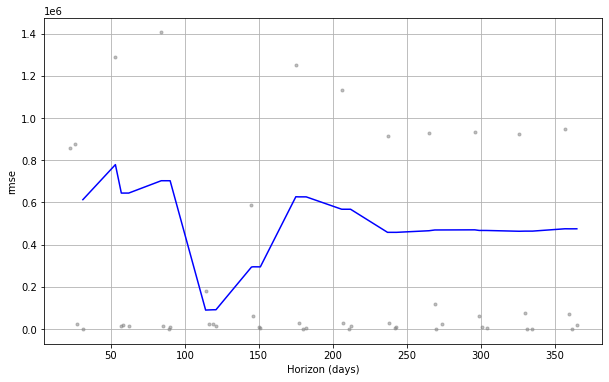

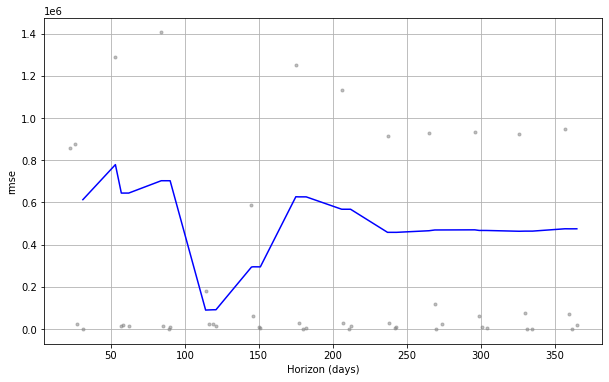

In [103]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(cv,metric='rmse')

# Working With Non Stationary Data

In [104]:
df.head()

,Dates,no_of_flights
0,1/1/2005,594924
1,2/1/2005,545332
2,3/1/2005,617540
3,4/1/2005,594492
4,5/1/2005,614802


In [105]:
# Non Stationary
ns_df = df

In [106]:
#  Works with a ds and y column names
ns_df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)
ns_df.head()

,ds,y
0,1/1/2005,594924
1,2/1/2005,545332
2,3/1/2005,617540
3,4/1/2005,594492
4,5/1/2005,614802


<AxesSubplot:>

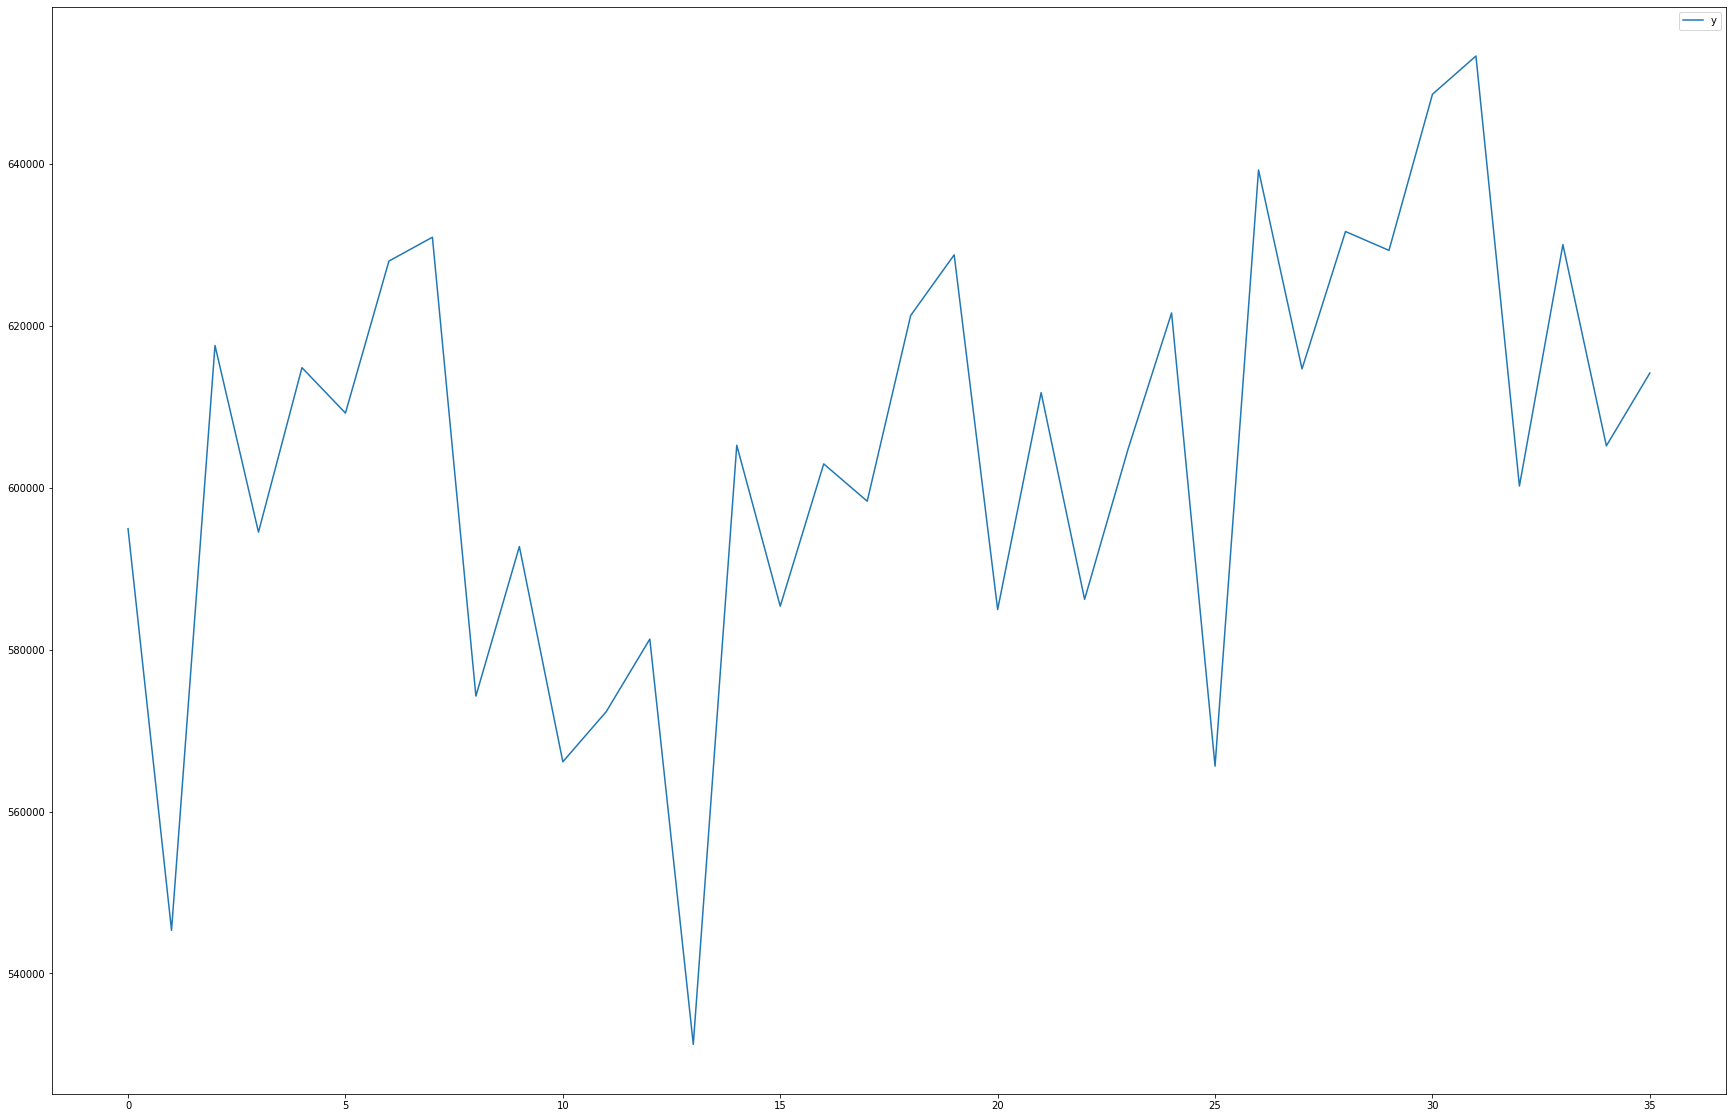

In [107]:
ns_df.plot()

In [108]:
# Build our model
model2 = Prophet()
# Fit our Mode to our Data
model2.fit(ns_df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
# Create Future Dates of 360 days
future_dates2 = model2.make_future_dataframe(periods=365)

In [110]:
# Make Prediction with our Model
prediction2 = model2.predict(future_dates2)
prediction2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,592724.358297,593415.690402,595927.102678,592724.358297,592724.358297,1966.605449,1966.605449,1966.605449,1966.605449,1966.605449,1966.605449,0.0,0.0,0.0,594690.963745
1,2005-02-01,594503.803211,544261.082262,546766.430085,594503.803211,594503.803211,-48987.793771,-48987.793771,-48987.793771,-48987.793771,-48987.793771,-48987.793771,0.0,0.0,0.0,545516.009440
2,2005-03-01,596111.043772,616351.829405,618845.310119,596111.043772,596111.043772,21457.458173,21457.458173,21457.458173,21457.458173,21457.458173,21457.458173,0.0,0.0,0.0,617568.501944
3,2005-04-01,597890.488675,594046.107532,596617.047156,597890.488675,597890.488675,-2616.461115,-2616.461115,-2616.461115,-2616.461115,-2616.461115,-2616.461115,0.0,0.0,0.0,595274.027560
4,2005-05-01,599612.532135,613445.977961,615965.533349,599612.532135,599612.532135,15105.598925,15105.598925,15105.598925,15105.598925,15105.598925,15105.598925,0.0,0.0,0.0,614718.131061


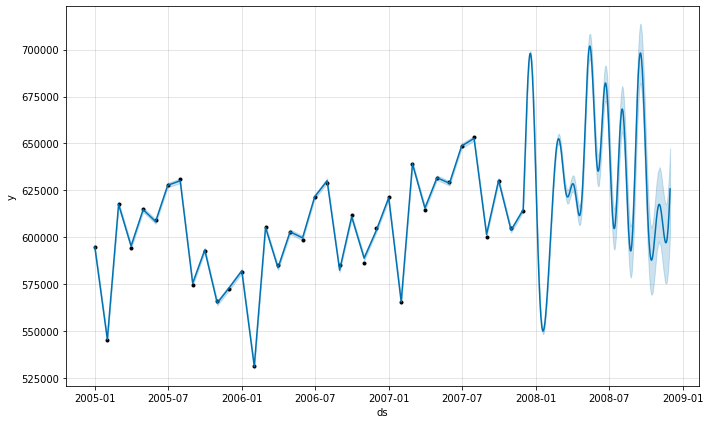

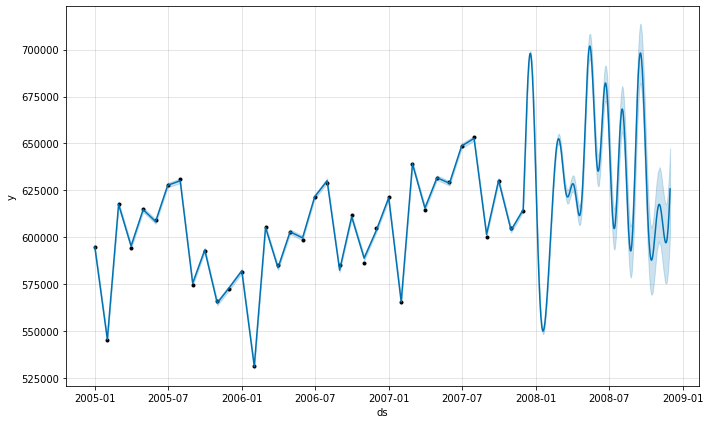

In [111]:
# Plot Our Predictions
model2.plot(prediction2)

A Trending data

Black dots : the actual data points in our dataset.
    
Deep blue line : the predicted forecast/the predicted values
    
Light blue line : the boundaries

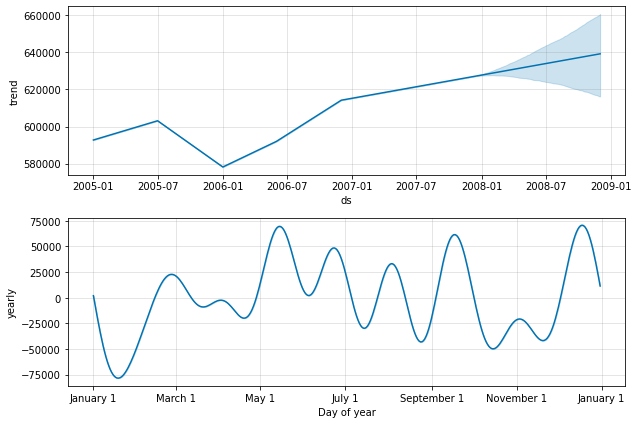

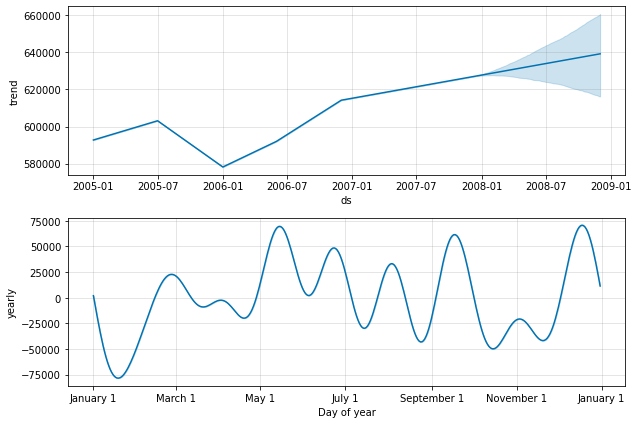

In [112]:
# Visualize Each Component [Trends,Weekly]
model2.plot_components(prediction2)